After the 2020 US presidential election, a theory circled (mainly among classical liberals) that the election was a victory for moderates: in the sense that Trump lost the presidency but Democrats failed to win over the Senate (which would have given them substantial legislative power). 

I was curious to see if the 2020 election was an outlier in terms of a vote percentage discrepancy between the Presidential and Senate races. This was done by looking at voting data on a state-by-state basis, looking at the dominance of parties based on vote shares in Presidential and Senate elections. 

I'm using data from MIT:s Election Data and Science Lab (MEDSL). By the looks of it, 2020 did not show a large discrepancy in Republican vote shares per state between Presidential and Senate races. On the contrary, the vote percentage gap seems to be smaller than ever. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Special functions for this purpose
from functions import vote_shares, join_regular_special_elections, votes_by_state_party_year, visualise_federal_level, visualise_state_level, visualise_votes_per_party

In [2]:
# https://dataverse.harvard.edu/dataverse/medsl_election_returns
pres = pd.read_csv('../1_Data/mit/1976-2020-president.csv', encoding='unicode_escape')
senate = pd.read_csv('../1_Data/mit//1976-2020-senate.csv', encoding='unicode_escape')
house = pd.read_csv('../1_Data/mit//1976-2018-house3.csv', encoding='unicode_escape')

In [3]:
house.sample(3)

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket
29385,2018,TEXAS,TX,48,74,49,US HOUSE,15,gen,NaN,False,ANTHONY CRISTO,LIBERTARIAN,False,TOTAL,2607,164802,False,20201202,False
26960,2016,CALIFORNIA,CA,6,93,71,US HOUSE,43,gen,NaN,False,OMAR NAVARRO,REPUBLICAN,False,TOTAL,52499,219516,False,20201202,False
652,1976,NEBRASKA,NE,31,46,35,US HOUSE,3,gen,False,False,SCATTER,NaN,False,TOTAL,8,206765,False,20201202,False


In [4]:
house = (
    house
    .rename(columns={'party': 'party_simplified'})
)

In [5]:
house.year.unique()

array([1976, 1978, 1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996,
       1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])

## Aggregate and merge data from Presidential, Senate and House races per state, party and year

In [6]:
vote_shares = votes_by_state_party_year(house_data=house, senate_data=senate, pres_data=pres)

In [7]:
vote_shares.sample(5)

,state,year,party_simplified,PRES_candidate_votes,PRES_total_votes,PRES_share_of_votes,SENATE_candidate_votes,SENATE_total_votes,SENATE_share_of_votes,HOUSE_candidate_votes,HOUSE_total_votes,HOUSE_share_of_votes,PRES_minus_SENATE_diff,PRES_minus_HOUSE_diff,SENATE_minus_HOUSE_diff
2241,WEST VIRGINIA,1984,OTHER,2134,735742,0.003,3299.0,722212.0,0.005,NaN,NaN,NaN,-0.002,NaN,NaN
1985,TENNESSEE,2008,OTHER,33134,2599749,0.013,77872.0,2424585.0,0.032,NaN,NaN,NaN,-0.019,NaN,NaN
2276,WEST VIRGINIA,2020,REPUBLICAN,545382,794652,0.686,547454.0,778918.0,0.703,NaN,NaN,NaN,-0.017,NaN,NaN
1745,OREGON,1996,LIBERTARIAN,8903,1377760,0.006,12697.0,1360230.0,0.009,25475.0,1335061.0,0.019,-0.003,-0.013,-0.010
2036,TEXAS,2012,REPUBLICAN,4569843,7993851,0.572,4440137.0,7864822.0,0.565,4429270.0,7664208.0,0.578,0.007,-0.006,-0.013


## Visualise discrepancies between political races

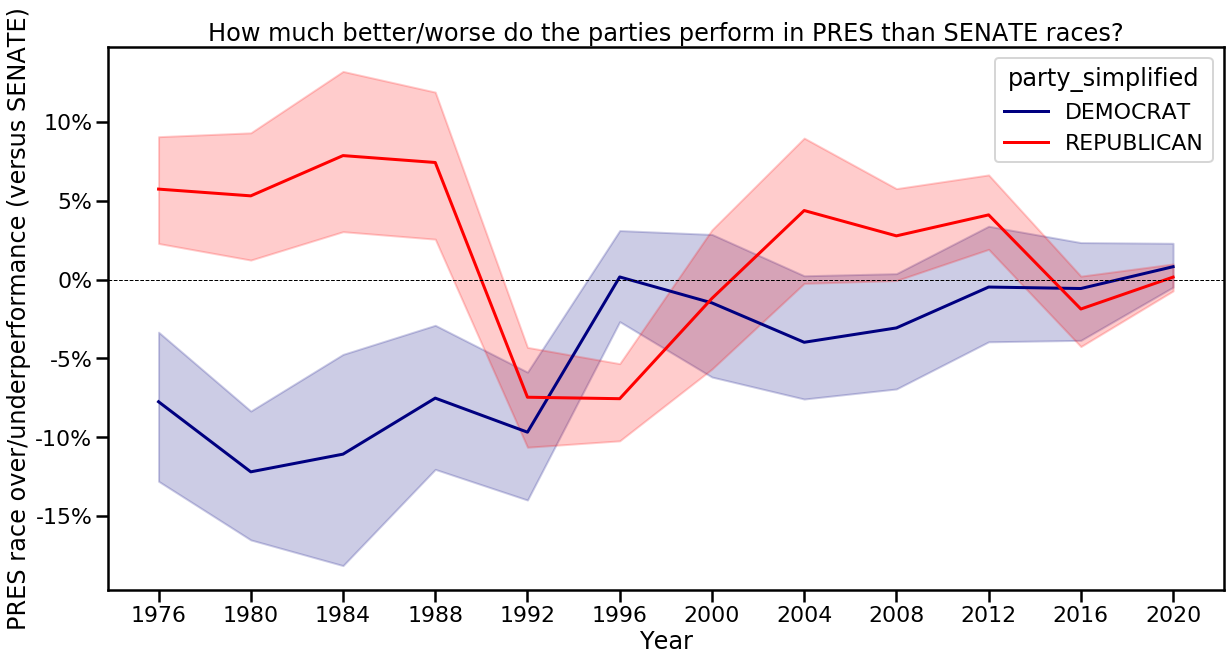

In [8]:
parties = list(["REPUBLICAN", "DEMOCRAT"]) # Select TWO and only TWO parties

visualise_federal_level(election_data=vote_shares, metric='PRES_minus_SENATE_diff', parties=parties)

plt.savefig('../3_Output/federal_level.png', bbox_inches='tight')

<Figure size 720x720 with 0 Axes>

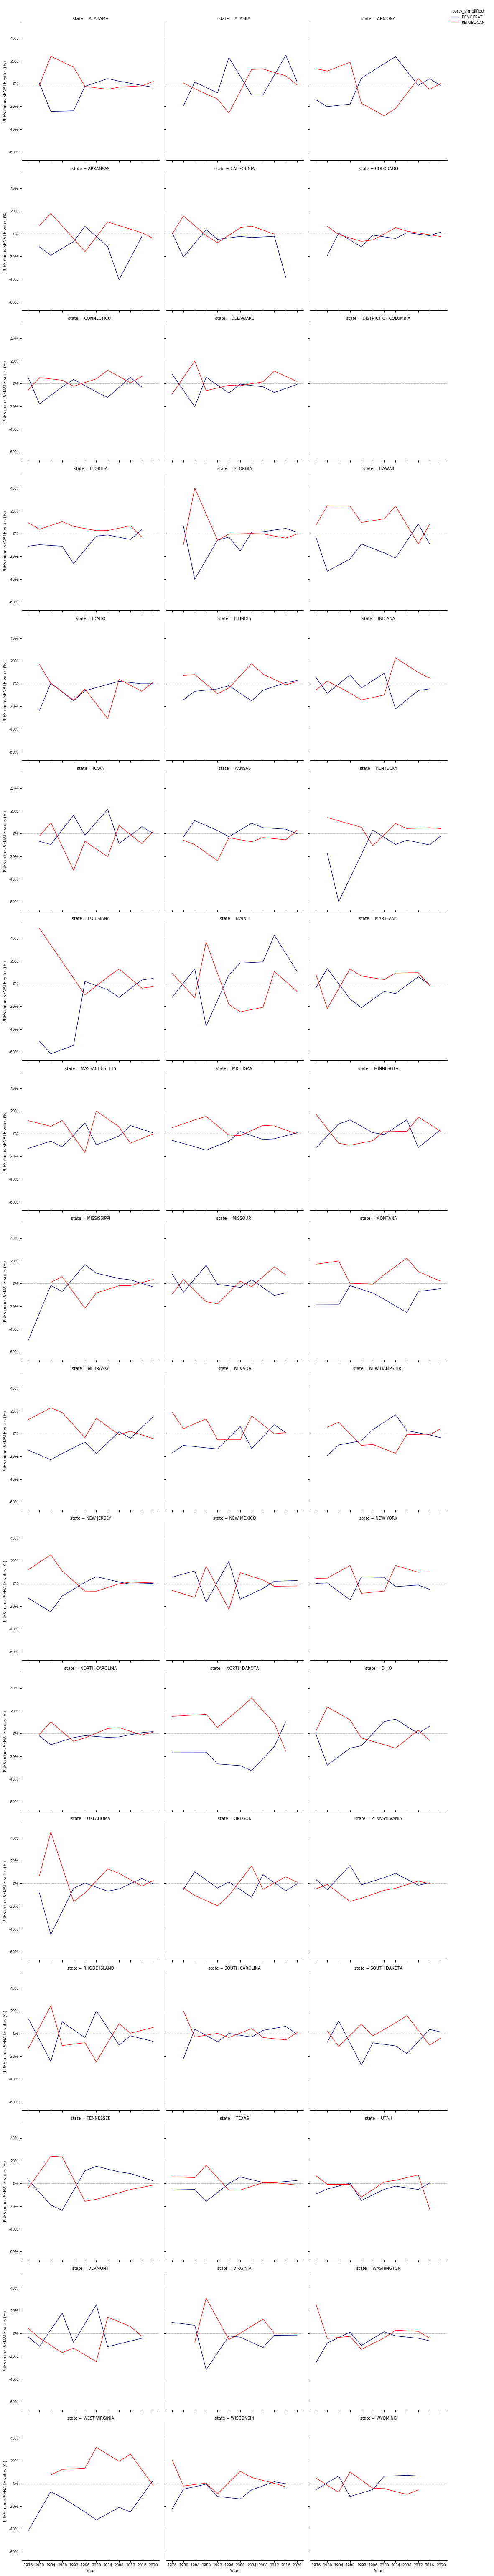

<Figure size 432x288 with 0 Axes>

In [9]:
parties = list(["REPUBLICAN", "DEMOCRAT"]) # Select TWO and only TWO parties

visualise_state_level(election_data=vote_shares, metric='PRES_minus_SENATE_diff', parties=parties);

plt.savefig('../3_Output/state_level.png', bbox_inches='tight')

## Visualise general changes in votes per party, year and political race

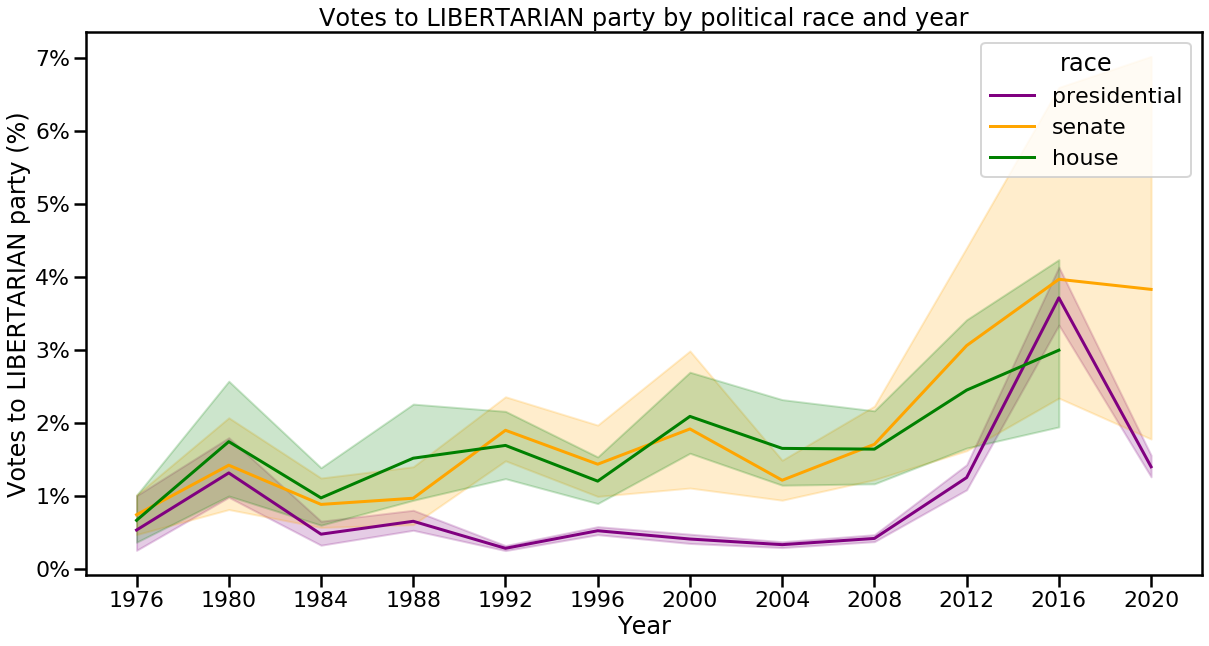

In [10]:
party = ["LIBERTARIAN"] # Select ONE and only ONE party

visualise_votes_per_party(election_data=vote_shares, party=party)

plt.savefig('../3_Output/libertarian_increase.png', bbox_inches='tight')